            Temperature
Date                   
01-01-1981         20.7
02-01-1981         17.9
03-01-1981         18.8
04-01-1981         14.6
05-01-1981         15.8


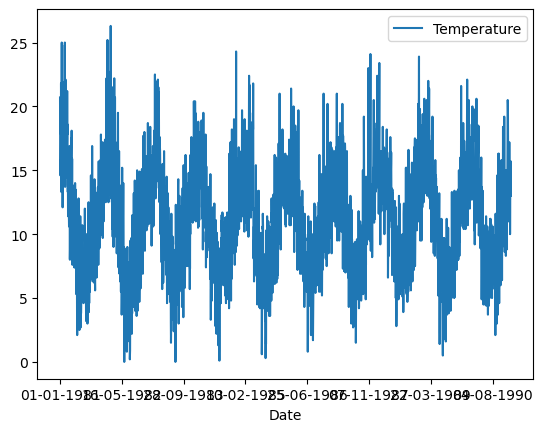

In [9]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv(r"C:\Users\jeeva P\Downloads\daily-min-temperatures.csv", header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

C:\Users\jeeva P\AppData\Local\Temp\ipykernel_15944\2963087572.py:9: UserWarning: Parsing '13-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\jeeva P\AppData\Local\Temp\ipykernel_15944\2963087572.py:9: UserWarning: Parsing '14-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\jeeva P\AppData\Local\Temp\ipykernel_15944\2963087572.py:9: UserWarning: Parsing '15-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\jeeva P\AppData\Local\Temp\ipykernel_15944\2963087572.py:9: UserWarning: Parsing '16-01-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users

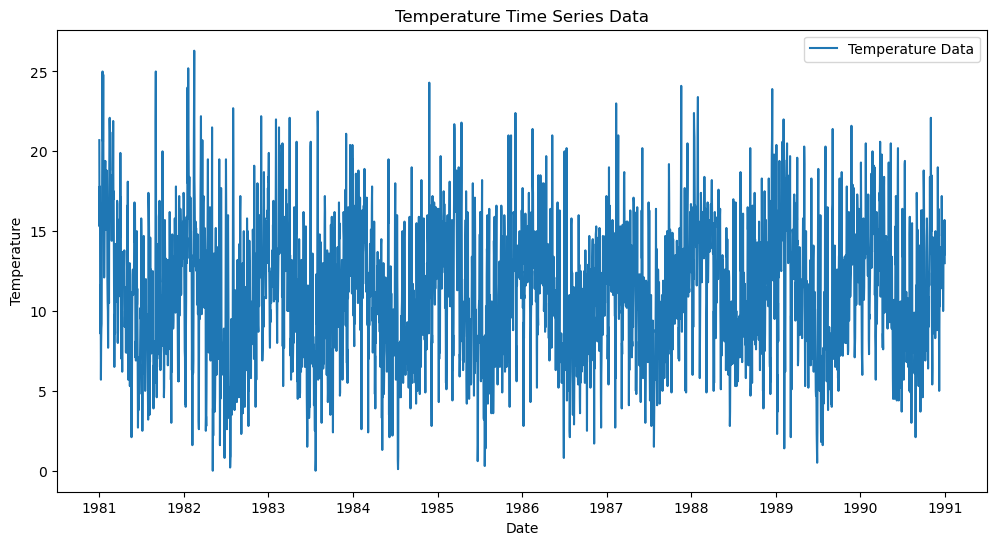

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\jeeva P\Downloads\daily-min-temperatures.csv")  # Replace 'temperature_data.csv' with your dataset file

# Convert the date column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Sort the data by date (just to be safe)
data = data.sort_index()

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series Data')
plt.legend()
plt.show()


C:\Users\jeeva P\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jeeva P\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jeeva P\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


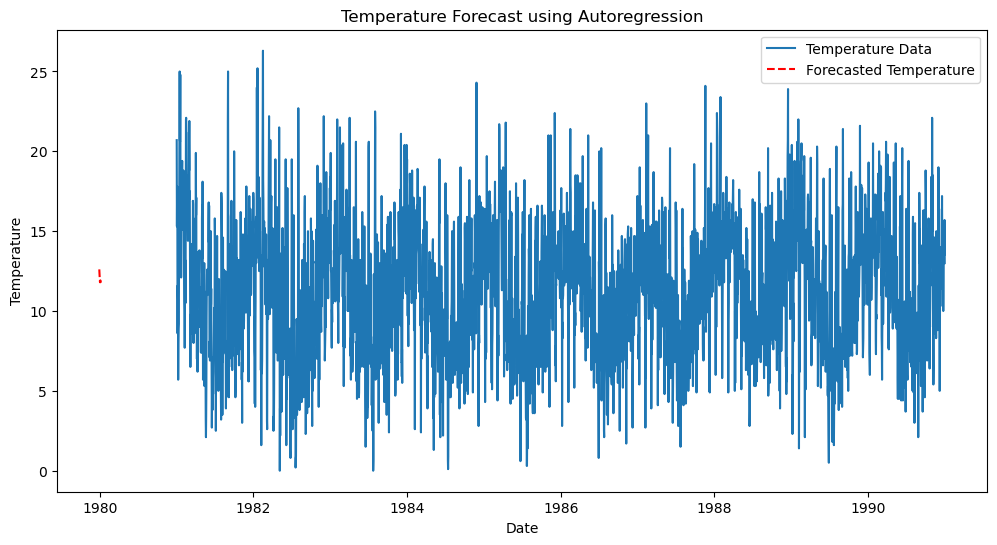

In [11]:
# Create an autoregressive model (AR)
lags = 7  # Number of lags for the autoregressive model (you can change this)
model = sm.tsa.AutoReg(data['Temperature'], lags=lags)
results = model.fit()

# Perform forecasting
forecast_values = results.predict(start=len(data), end=len(data) + lags - 1, dynamic=False)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Temperature Data')
plt.plot(forecast_values.index, forecast_values, label='Forecasted Temperature', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using Autoregression')
plt.legend()
plt.show()

In [12]:
# Print the forecasted values
print("Forecasted Temperature Values:")
print(forecast_values)

Forecasted Temperature Values:
3650    12.607152
3651    12.331274
3652    12.072388
3653    11.820248
3654    11.796653
3655    11.919470
3656    11.769712
dtype: float64
